# Exercise 1 Subpoint a

We start with simulating the event described bellow:
- Urn consisting of 3 red balls, 4 blue balls and 2 black balls
- Roll a die
- if the die face is a prime number 1 black ball to the urn
- if the die face is 6, 1 red ball to the urn
- if the die face is something else, 1 blue ball to the urn

In [10]:
import numpy as np

def simulate_urn():
    urn = {"red":3, "blue":4, "black":2}

    die_roll = np.random.randint(1,7)

    if die_roll in [2, 3, 5]:
        urn["black"] += 1
        color = "black"
    elif die_roll == 6:
        urn["red"] += 1
        color = "red"
    else:
        urn["blue"] += 1
        color = "blue"

    return urn, color, die_roll

simulate_urn()

({'red': 4, 'blue': 4, 'black': 2}, 'red', 6)

# Exercise 1 subpoint b
In order to get an estimation of the probability to get the red ball, we need to run the simulation function 1000 times and compute the probability to pick a red ball based off

In [11]:
def experiment_trial(nr_of_tries=10000):
    red_count = 0
    for _ in range(nr_of_tries):
        urn, color, die_roll = simulate_urn()

        balls = ["red"] * urn["red"] + ["blue"] * urn["blue"] + ["black"] * urn["black"]
        drawn_ball = np.random.choice(balls)

        if drawn_ball == "red" :
            red_count += 1
    probability = red_count/nr_of_tries

    print(f"Probability to get a red ball: {probability}")

experiment_trial()

Probability to get a red ball: 0.3237


# Excercise 2 subpoint a

In [12]:
import pymc as pm
import numpy as np


np.random.seed(123)

In [13]:
lambdas = [1, 2, 5, 10]
simulations_nr = 1000

simulation_results = {}

for lam in lambdas:
    key = f"Poison({lam})"
    simulation_results[key] = np.random.poisson(lam=lam, size=simulations_nr)

for lam in lambdas:
    key = f"Poison({lam})"
    data = simulation_results[key]
    print(f"{key}")
    print(f"Mean={data.mean()}")
    print(f"Variance={data.var()}")
    print(f"First 10 values: {data[:10]}")

Poison(1)
Mean=0.989
Variance=1.018879
First 10 values: [1 0 2 2 1 1 0 1 0 0]
Poison(2)
Mean=1.957
Variance=1.9471510000000003
First 10 values: [4 1 3 2 4 1 1 4 0 3]
Poison(5)
Mean=5.0
Variance=4.978
First 10 values: [ 6  1 10  3  3  7  6  5  4  6]
Poison(10)
Mean=9.948
Variance=10.603296
First 10 values: [12 12 12  4 11  5  9 10  8 16]


# Exercise 2 Subpoint b

In [14]:
random_poison = []
for _ in range(simulations_nr):
    select_lambda = np.random.choice(lambdas)
    value = np.random.poisson(lam=select_lambda, size=simulations_nr)
    random_poison.append(value)

random_poison = np.array(random_poison)

print(f"Mean = {random_poison.mean()}")
print(f"Variance = {random_poison.var()}")
print(f"First 20 values: {random_poison[:20]}")


Mean = 4.410597
Variance = 16.542041103591
First 20 values: [[ 8  5 11 ...  8 13  7]
 [ 0  1  0 ...  2  1  1]
 [ 4  0  1 ...  1  0  2]
 ...
 [ 3  4  1 ...  1  4  3]
 [ 2  0  1 ...  2  1  0]
 [ 2  4  2 ...  2  2  3]]


# Exercise 2 Subpoint c

Text(0.5, 1.0, 'Randomized Poisson')

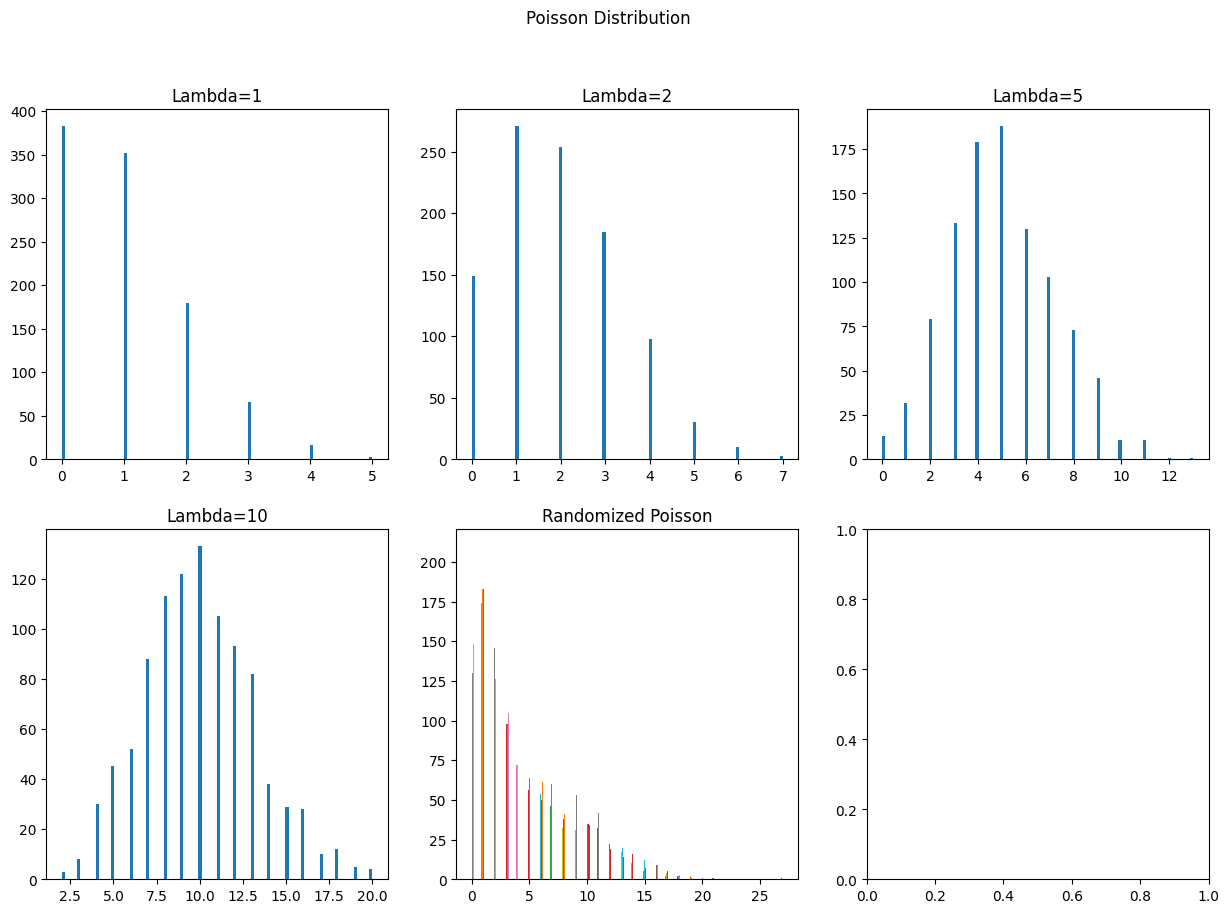

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle("Poisson Distribution")

# Fixed parameters plot

for idx, lam in enumerate(lambdas):
    key = f"Poison({lam})"
    data = simulation_results[key]
    axes[idx//3, idx%3].hist(data, bins=100)
    axes[idx//3, idx%3].set_title(f"Lambda={lam}")

# Random parameter plot

axes[1,1].hist(random_poison, bins=100)
axes[1,1].set_title("Randomized Poisson")